In [203]:
import pandas as pd
import numpy as np
import seaborn as sns

In [204]:
train=pd.read_csv(r'C:\Users\Abhishek\Downloads\q1_data\train.csv')
test=pd.read_csv(r'C:\Users\Abhishek\Downloads\q1_data\test.csv')

In [205]:
train.describe()""""we can observe outliers present w.r.t to looking at he 75% and the max where ever there is a 
huge differnece there is a presence of outlier eg in age we have outlier >1.5*q3

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
train.info() #cabin and age column has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# lets perform some EDA on the given train data

<AxesSubplot:xlabel='Pclass', ylabel='count'>

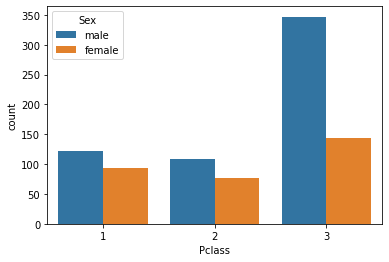

In [209]:
sns.countplot(x='Pclass', data=train,hue='Sex') # in class 3 we can see the male count is twice as of female

<AxesSubplot:xlabel='Sex', ylabel='count'>

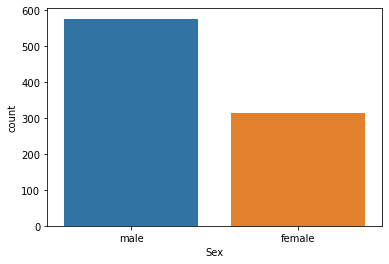

In [210]:
sns.countplot(x='Sex', data=train)# total number of male passengers are more than that of the female passengers 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

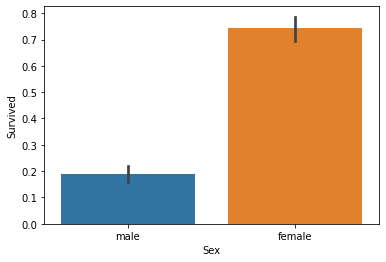

In [211]:
sns.barplot(x='Sex',y='Survived', data=train)# number of females have survived more than that of male

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

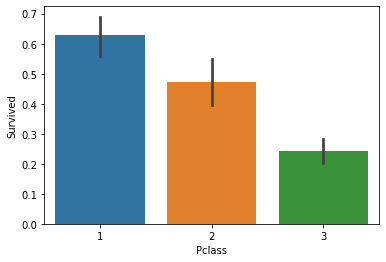

In [212]:
sns.barplot(x='Pclass',y='Survived', data=train)# from the below plot we can see that the chaces of survival of class p3 is the least

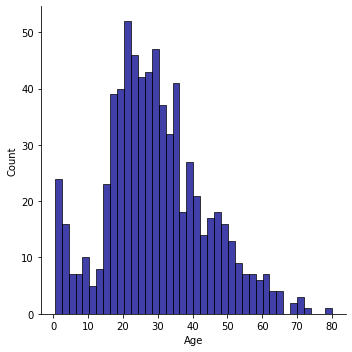

In [213]:
sns.displot(train['Age'].dropna(),kde=False,color='darkblue',bins=40)# below plot show the avg age range who were onboard in titanic

In [214]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='SibSp', ylabel='count'>

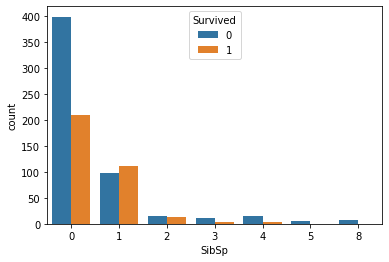

In [215]:
 sns.countplot(x = "SibSp",hue="Survived", data=train)# from this we can say that people with sibling or spouse wer less in number

# now lets do data imputation and remove unwanted columns since they dont make any 

In [216]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [218]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [219]:
common='S'
train['Embarked'] = train['Embarked'].fillna(common)

In [220]:
#since embarked and is a categorical variable lets get dummies for the particular column
train= pd.get_dummies(train,columns=["Embarked","Sex"],drop_first=True)

In [221]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1


In [222]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.033606,0.022204,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.003650,-0.149683,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.221009,0.074053,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.022405,-0.023233,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.026354,0.068734,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.081228,0.060814,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.117216,-0.162184,-0.182333
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,1.000000,-0.499421,-0.074115
Embarked_S,0.022204,-0.149683,0.074053,-0.023233,0.068734,0.060814,-0.162184,-0.499421,1.000000,0.119224
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-0.074115,0.119224,1.000000


# from the above correlation we can see that we dont require few columns for analysis with respect to survival rate henec we can drop them out

In [223]:
train.drop(['Name','Ticket','Cabin','Fare'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [224]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.0,1,0,0,1,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,1,0
3,4,1,1,35.0,1,0,0,1,0
4,5,0,3,35.0,0,0,0,1,1


In [225]:
train.Age=train.Age.fillna(train.Age.mean())

In [226]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [227]:
train=train.drop('PassengerId',axis=1)

# we do the same above processing for test data also 

In [228]:
common='S'
test['Embarked'] = test['Embarked'].fillna(common)
test= pd.get_dummies(test,columns=["Embarked","Sex"],drop_first=True)

In [229]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,892,3,34.5,0,0,1,0,1
1,893,3,47.0,1,0,0,1,0
2,894,2,62.0,0,0,1,0,1
3,895,3,27.0,0,0,0,1,1
4,896,3,22.0,1,1,0,1,0


In [230]:
test.Age=test.Age.fillna(test.Age.mean())

In [231]:
test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

# Building our Model we will be using random forest and boosting and compare the accuracy and then predict 

In [232]:
X_train = train.drop("Survived", axis=1)# removing survived col from X_train since we need it as a label so well use it in Y_train
Y_train = train["Survived"]

In [233]:
X_test=test.drop('PassengerId',axis=1)# just choosing the Pid since we will be predicting the survival 

In [234]:
from sklearn.ensemble import RandomForestClassifier
rd_clf=RandomForestClassifier()

In [235]:
rd_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [236]:
Y_pred = rd_clf.predict(X_test)
acc_random_forest = round(rd_clf.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.71

In [237]:
from sklearn.ensemble import GradientBoostingClassifier
gd_clf=GradientBoostingClassifier()
gd_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [238]:
Y_pre = gd_clf.predict(X_test)
acc_boost = round(gd_clf.score(X_train, Y_train) * 100, 2)
acc_boost

87.88

In [239]:
predicted = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
predicted.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [240]:
predicted.shape

(418, 2)

In [242]:
(predicted.Survived==1).sum(),(predicted.Survived==0).sum()

(141, 277)

In [243]:
predicted.to_csv("predicted.csv",index = False)

In [245]:
predicted.to_csv(r"C:\Users\Abhishek\Downloads\predicted.csv",index=False)

# conclusion: 141 predicted to have survived and 277 predicted to have not survived